#**Cài đặt thư viện cần thiết cho bài project**


In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.mixed_precision import set_global_policy
from tensorflow.keras.layers import GlobalAveragePooling2D

#**Cài đặt và tài dataset từ kaggle**

In [ ]:
!pip install kaggle
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:49<00:00, 19.9MB/s]
100% 2.04G/2.04G [01:49<00:00, 20.0MB/s]


Kiểm tra file trong thư mục

In [ ]:
!ls

plantvillage-dataset.zip  sample_data


Giải nén dataset từ kaggle

In [ ]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

#**Chuẩn Bị Generators cho Dữ Liệu Huấn Luyện và Kiểm Tra**

In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    'plantvillage dataset/color',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset = 'training'
)

validation_generator = data_gen.flow_from_directory(
    'plantvillage dataset/color',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset= 'validation'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


#**Mô  hình CNN ban đầu để phân loại  bệnh từ các lá cây**


In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(38, activation='softmax')
])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=validation_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


679/679 ━━━━━━━━━━━━━━━━━━━━ 129s 175ms/step - accuracy: 0.5463 - loss: 1.8394 - val_accuracy: 0.8428 - val_loss: 0.5242
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 129s 169ms/step - accuracy: 0.8999 - loss: 0.3193 - val_accuracy: 0.8853 - val_loss: 0.3738
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 163s 200ms/step - accuracy: 0.9629 - loss: 0.1184 - val_accuracy: 0.8704 - val_loss: 0.4868
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 115s 168ms/step - accuracy: 0.9764 - loss: 0.0740 - val_accuracy: 0.8581 - val_loss: 0.6091
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 113s 165ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.8793 - val_loss: 0.5217
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 164s 198ms/step - accuracy: 0.9833 - loss: 0.0537 - val_accuracy: 0.8663 - val_loss: 0.6519
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 111s 162ms/step - accuracy: 0.9865 - loss: 0.0454 - val_accuracy: 0.8619 - val_loss: 0.6655
Epoch 8/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 115s 168ms/step - accuracy: 0.9909 - loss: 0.03

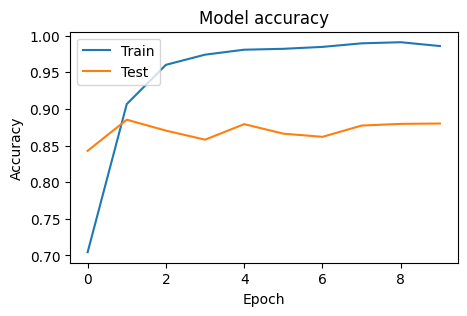

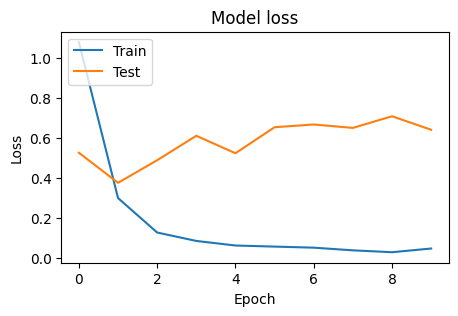

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
batch_size= 32
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8789 - loss: 0.6413 
Validation Accuracy: 88.01%


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


#**Tuning Hyperparameters**

In [ ]:
learning_rate = 0.0005
epochs = 10
batch_size = 64

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(38, activation='softmax')
])

optimizer = Adam(learning_rate=learning_rate)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(train_generator, epochs=epochs, batch_size=batch_size, validation_data=validation_generator)

Epoch 1/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 122s 176ms/step - accuracy: 0.4907 - loss: 2.0856 - val_accuracy: 0.7934 - val_loss: 0.6797
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 132s 163ms/step - accuracy: 0.8509 - loss: 0.4861 - val_accuracy: 0.8651 - val_loss: 0.4395
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 144s 167ms/step - accuracy: 0.9290 - loss: 0.2364 - val_accuracy: 0.8852 - val_loss: 0.3737
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 141s 165ms/step - accuracy: 0.9642 - loss: 0.1210 - val_accuracy: 0.8833 - val_loss: 0.3915
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 142s 165ms/step - accuracy: 0.9770 - loss: 0.0764 - val_accuracy: 0.8731 - val_loss: 0.4762
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 113s 166ms/step - accuracy: 0.9868 - loss: 0.0474 - val_accuracy: 0.8901 - val_loss: 0.4201
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 140s 163ms/step - accuracy: 0.9897 - loss: 0.0360 - val_accuracy: 0.8787 - val_loss: 0.4897
Epoch 8/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 109s 159ms/step - accuracy: 0.9930 -

In [ ]:
val_loss, val_accuracy = model1.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.8872 - loss: 0.5203
Validation Accuracy: 88.53%


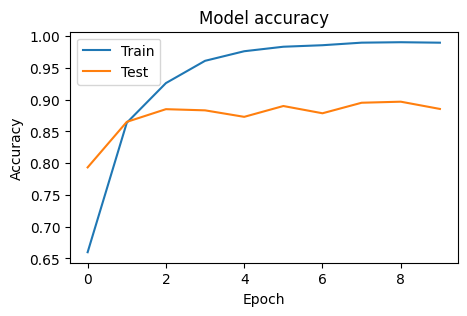

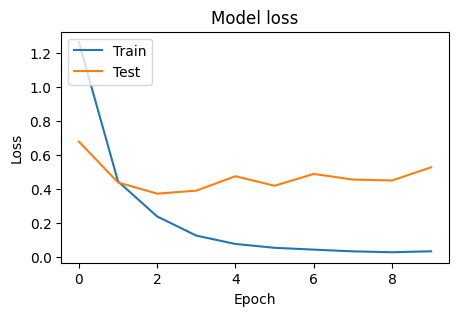

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(figsize=(5,3))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#**Regularization**

Thêm lớp Dropout và L2 Regularization để tránh overfitting.

In [ ]:
learning_rate = 0.0005
epochs = 10
batch_size = 64
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(38, activation='softmax')
])
optimizer = Adam(learning_rate=learning_rate)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_generator, epochs=epochs, batch_size=batch_size, validation_data=validation_generator)

Epoch 1/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 112s 159ms/step - accuracy: 0.2812 - loss: 3.4170 - val_accuracy: 0.6353 - val_loss: 1.8061
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 109s 160ms/step - accuracy: 0.5049 - loss: 2.1519 - val_accuracy: 0.6983 - val_loss: 1.5296
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 143s 161ms/step - accuracy: 0.5520 - loss: 1.9306 - val_accuracy: 0.7090 - val_loss: 1.4357
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 109s 160ms/step - accuracy: 0.5815 - loss: 1.8182 - val_accuracy: 0.7301 - val_loss: 1.3421
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 145s 164ms/step - accuracy: 0.5919 - loss: 1.7729 - val_accuracy: 0.7622 - val_loss: 1.2649
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 112s 164ms/step - accuracy: 0.6087 - loss: 1.7133 - val_accuracy: 0.7578 - val_loss: 1.2480
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 111s 163ms/step - accuracy: 0.6240 - loss: 1.6631 - val_accuracy: 0.7476 - val_loss: 1.2873
Epoch 8/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 112s 164ms/step - accuracy: 0.6264 -

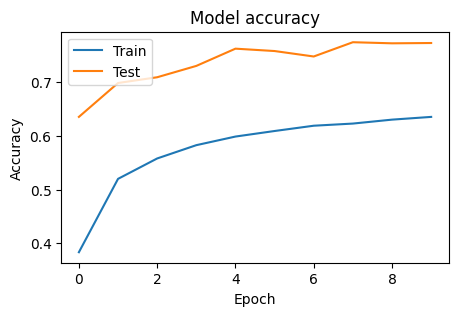

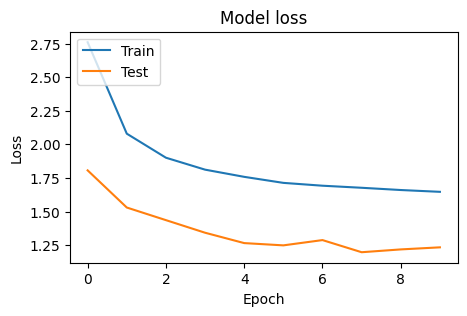

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(figsize=(5,3))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
val_loss, val_accuracy = model2.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.7719 - loss: 1.2285
Validation Accuracy: 77.29%


#**Optimization**

Áp dụng callback để giảm learning rate tự động khi độ chính xác không cải thiện, giúp tối ưu hóa hiệu quả của quá trình học.

In [ ]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(38, activation='softmax')
])
model3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
history3 = model3.fit(train_generator, epochs=10, batch_size=64, validation_data=validation_generator, callbacks=[lr_scheduler])

Epoch 1/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 118s 170ms/step - accuracy: 0.5528 - loss: 1.8642 - val_accuracy: 0.8594 - val_loss: 0.4553 - learning_rate: 0.0010
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 112s 165ms/step - accuracy: 0.9073 - loss: 0.2976 - val_accuracy: 0.8728 - val_loss: 0.4171 - learning_rate: 0.0010
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 143s 167ms/step - accuracy: 0.9641 - loss: 0.1156 - val_accuracy: 0.8733 - val_loss: 0.4613 - learning_rate: 0.0010
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 110s 161ms/step - accuracy: 0.9779 - loss: 0.0683 - val_accuracy: 0.8741 - val_loss: 0.5385 - learning_rate: 0.0010
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 113s 166ms/step - accuracy: 0.9810 - loss: 0.0564 - val_accuracy: 0.8832 - val_loss: 0.5286 - learning_rate: 0.0010
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 114s 166ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.8761 - val_loss: 0.6038 - learning_rate: 0.0010
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 115s 169ms/step - accura

In [ ]:
val_loss, val_accuracy = model3.evaluate(validation_generator, steps=validation_generator.samples // 64)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

169/169 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.9066 - loss: 0.5485
Validation Accuracy: 90.77%


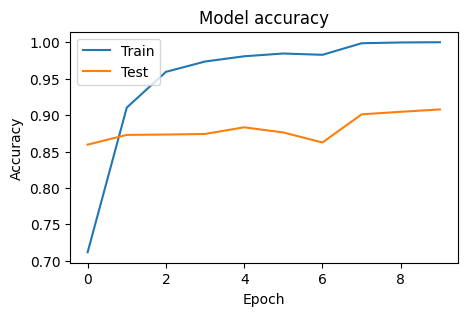

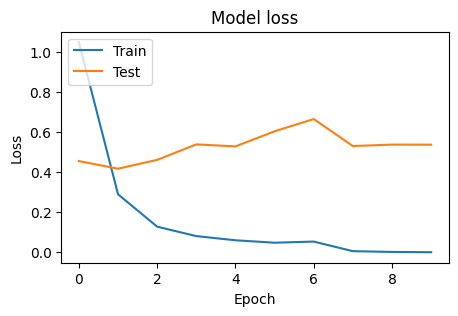

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(figsize=(5,3))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#**Kết hợp lại để mô hình tốt nhất**

In [ ]:
set_global_policy('mixed_float16')
learning_rate = 0.0005
epochs = 10
batch_size = 64
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model4 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(38, activation='softmax')
])
optimizer = Adam(learning_rate=learning_rate)
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history4 = model4.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[lr_scheduler, early_stopping]
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


679/679 ━━━━━━━━━━━━━━━━━━━━ 148s 193ms/step - accuracy: 0.7207 - loss: 1.1555 - val_accuracy: 0.9348 - val_loss: 0.2232 - learning_rate: 5.0000e-04
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 180s 175ms/step - accuracy: 0.9414 - loss: 0.1960 - val_accuracy: 0.9417 - val_loss: 0.1801 - learning_rate: 5.0000e-04
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 142s 176ms/step - accuracy: 0.9597 - loss: 0.1323 - val_accuracy: 0.9438 - val_loss: 0.1697 - learning_rate: 5.0000e-04
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 119s 174ms/step - accuracy: 0.9699 - loss: 0.0966 - val_accuracy: 0.9481 - val_loss: 0.1556 - learning_rate: 5.0000e-04
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 140s 172ms/step - accuracy: 0.9757 - loss: 0.0838 - val_accuracy: 0.9519 - val_loss: 0.1503 - learning_rate: 5.0000e-04
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 136s 199ms/step - accuracy: 0.9807 - loss: 0.0661 - val_accuracy: 0.9588 - val_loss: 0.1239 - learning_rate: 5.0000e-04
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 121s 169ms/

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model4.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

169/169 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.9665 - loss: 0.1048
Validation Accuracy: 96.31%


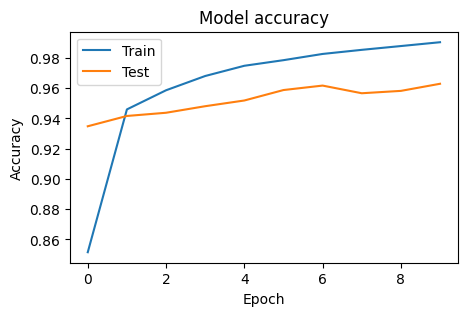

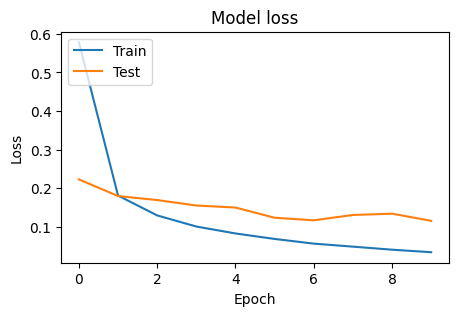

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(figsize=(5,3))
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#**Tải và tiền xử lý ảnh và test ảnh**

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
image_path = '/content/drive/MyDrive/AIL303m/Data/Cherry_(including_sour)___healthy/002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.jpg'
predicted_class_name = predict_image_class(model4, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted Class Name: Cherry_(including_sour)___healthy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Lưu mô hình được chạy tại h5**

In [ ]:
model4.save('/content/drive/MyDrive/AIL303m/modelsaveail.h5')

#**Lưu class_indices lại để có thể sử dụng**

In [ ]:
json_path = "/content/drive/MyDrive/AIL303m/class_indices.json"
with open(json_path, 'w') as f:
    json.dump(class_indices, f, indent=4)

print(f"Đã lưu class_indices.json vào {json_path}")


Đã lưu class_indices.json vào /content/drive/MyDrive/AIL303m/class_indices.json
